# White Wine Quality Classification
Kishlay Chhajer, Amy Lu, Anirudh Duggal, Karin Jin

## 1. Introduction
Portugal is a top ten wine exporting country holding 3% of the market share in 2017 (FAOSTAT, 2019). The vinho verde wine, often translated as “green wine”, is a unique product from the Northwest region of Portugal. The white wine variant is often described as light, crisp, and aromatic due to its natural acidity, while the red variant is darker and sour (Wines of Portugal, n.d.). The wine accounts for 15% of the total Portuguese wine production and around 10% is exported, comprising mainly of the white variant (Comissão de Viticultura da Região dos Vinhos Verdes, 2008). 

The Wine Quality Dataset contains information pertaining to the physicochemical characteristics of wine and quality scores given to samples of wine. The physicochemical characteristics are the eleven input variables: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. The output variable is the quality score, which is measured on a scale from 0 (very bad) to 10 (excellent). The quality score is derived based on the median score of at least three blind taste test evaluations made by wine experts.

The vinho verde wine dataset is divided by red and white variants. In this classification model we will be focusing solely on the white wine data set, which has 4898 observations compared to the red wine data set with 1599 observations. There is no data regarding the grape types, wine brand or selling price due to privacy and logistic issues. The original research project used a regression model to preserve the order of the wine scores and derive distinct accuracy results. The original number of observations in each class are imbalanced with much more average wines than good or bad ones. 

The question our project will aim to answer is **“Can we use the physicochemical properties of wine to objectively predict whether the quality of a future unknown wine will be bad, normal, or good?”** Being able to answer this question may lead to insights on how we can improve the efficiency and accuracy of both the wine production and certification process.


## 2. Method & Results
First, we found the wine dataset on the internet, and read it into R. Since the quality of wine is originally numerical, we first divided the quality scores into three categories. For quality scores > 6, we classified it as “good”, for scores < 5, we classified it as bad, and for scores between 5 and 6 inclusive, we classified it as “normal”. 

We then cleaned the data, split the data into training and testing sets, and scaled the data. We also balanced the training set since there were too many “normal” wines. 

We summarized the data and visualized the relationship between different variables using “ggpairs”. Then we decided to use volatile acidity, citric acid, residual sugar, chlorides, density and sulphates as the predictors. We used cross-validation with different k-values and found k=1 to be the optimal choice. Then we established the classifier and predicted the testing set with an accuracy of 78%. 

In [ ]:
library(repr)
library(tidyverse)
library(caret)
library(digest)
library(repr)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



**2.1 Reading in the Data and Classification**

In [ ]:
# read the dataset in to jupyter
wine_quality<-read_csv2("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv")
head(wine_quality)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.
Parsed with column specification:
cols(
  `fixed acidity` = col_number(),
  `volatile acidity` = col_character(),
  `citric acid` = col_character(),
  `residual sugar` = col_character(),
  chlorides = col_character(),
  `free sulfur dioxide` = col_number(),
  `total sulfur dioxide` = col_number(),
  density = col_character(),
  pH = col_number(),
  sulphates = col_character(),
  alcohol = col_number(),
  quality = col_double()
)


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.4,99,6
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.4,99,6
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6


In [ ]:
#classify the wine
wine_data_good<-wine_quality%>%
    filter(quality>6)%>%
    mutate(quality_3="good")
wine_data_normal<-wine_quality%>%
    filter(between(quality,5,6))%>%
    mutate(quality_3="normal")
wine_data_bad<-wine_quality%>%
    filter(quality<5)%>%
    mutate(quality_3="bad")
wine_all<-rbind(wine_data_good,wine_data_normal,wine_data_bad)
 head(wine_all)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_3
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
66,0.16,0.4,1.5,0.044,48,143,0.9912,354,0.52,124,7,good
66,0.17,0.38,1.5,0.032,28,112,0.9914,325,0.55,114,7,good
62,0.66,0.48,1.2,0.029,29,75,0.9892,333,0.39,128,8,good
62,0.66,0.48,1.2,0.029,29,75,0.9892,333,0.39,128,8,good
64,0.31,0.38,2.9,0.038,19,102,0.9912,317,0.35,11,7,good
68,0.26,0.42,1.7,0.049,41,122,0.993,347,0.48,105,8,good


**2.2 Data Cleaning**

First, we replaced all the spaces in the column names with periods. Then we changed the type of predictors into numerics, and the quality into factor. 

In [ ]:
# change the column name
colnames(wine_all)<-make.names(names(wine_all))
# change the variables into numerical factors
wine_all<-wine_all%>%
    mutate(volatile.acidity=as.numeric(volatile.acidity))%>%
    mutate(citric.acid=as.numeric(citric.acid))%>%
    mutate(residual.sugar=as.numeric(residual.sugar))%>%
    mutate(chlorides=as.numeric(chlorides))%>%
    mutate(density=as.numeric(density))%>%
    mutate(sulphates=as.numeric(sulphates))%>%
    mutate(quality_3=as.factor(quality_3))

Fig.1 shows the distribution of wine quality. We can see that our dataset is imbalanced and there is a high proportion of "normal" scores. This is our reason for upsampling later. 

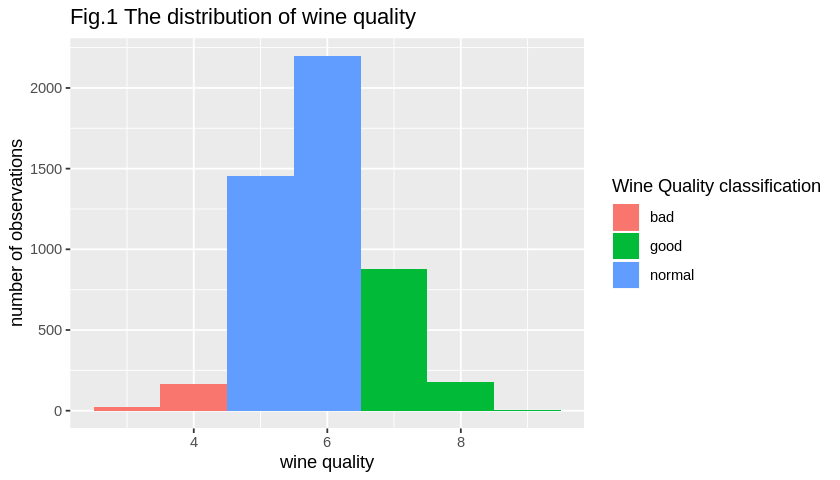

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 4) 
distribution_quality<-ggplot(wine_all,aes(x=quality,fill=factor(quality_3)))+
    geom_histogram(binwidth=1)+
    labs(x="wine quality",y="number of observations",fill="Wine Quality classification")+
    ggtitle("Fig.1 The distribution of wine quality")
distribution_quality

**2.3 Data Summary**

We split the data into training set and testing set; the training set uses 75% of the data in the whole dataset.

In our dataset, there are no missing (NA) values. The summary table below presents some basic information on our training set.

Then we scaled the data and visualized some variables and their relationships.

In [ ]:
set.seed(1234)
training_rows<-wine_all%>%
    select(quality_3)%>%
    unlist()%>%
    createDataPartition(p = 0.75, list = FALSE)
training_set <- wine_all %>% slice(training_rows)
testing_set <- wine_all %>% slice(-training_rows)
num_train<-group_by(training_set,quality_3)%>%
    summarize(n=n())
num_test<-group_by(testing_set,quality_3)%>%
    summarize(n=n())
num_all<- merge(num_train,num_test,by="quality_3")
colnames(num_all)<-c("#_of_obeservations","training_set","testing_set")
num_all

#_of_obeservations,training_set,testing_set
<fct>,<int>,<int>
bad,138,45
good,795,265
normal,2742,913


In [ ]:
# see if there exist NA data.
na_result<-sum(is.na(training_set))
na_result

[1] 0

In [ ]:
# summarize the data
max_of_columns <- training_set%>%
    select(-quality_3)%>%
map_df(max)

min_of_columns <- training_set%>%
    select(-quality_3)%>%
map_df(min)

mean_of_columns <- training_set%>%
    select(-quality_3)%>%
map_df(mean)

summary_wine_train<-rbind(max_of_columns,min_of_columns,mean_of_columns)

labels<-c("max","min","mean")
summary_wine_train<-cbind(labels,summary_wine_train)
summary_wine_train

labels,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
max,715.00000,1.1000000,1.6600000,31.600000,0.34600000,1465.0000,3665.0000,1.0103000,382.0000,1.0100000,9.633333e+14,9.000000
min,5.00000,0.0800000,0.0000000,0.600000,0.01200000,2.0000,9.0000,0.9871300,3.0000,0.2200000,8.000000e+00,3.000000
mean,62.33415,0.2778898,0.3345986,6.402544,0.04622912,41.2381,150.7619,0.9940354,286.9829,0.4901714,1.044517e+12,5.878095


In [ ]:
# normalize the data using training set
scale_transformer <- preProcess(training_set, method = c("center", "scale")) 
scaled_wine_all <- predict(scale_transformer, wine_all)
scaled_training_set<- predict(scale_transformer, training_set)
scaled_testing_set<-predict(scale_transformer, testing_set)
head(scaled_training_set)
head(scaled_testing_set)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,quality_3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.11978773,-1.1720487,0.5345235,-0.9770491,-0.09769621,0.09940198,-0.04613600,-0.9676694,0.7250930,0.2631763,-0.04420377,1.271269,good
0.11978773,-1.0726297,0.3710640,-0.9770491,-0.62362429,-0.19460388,-0.23039694,-0.8994122,0.4113271,0.5278650,-0.04420377,1.271269,good
-0.01091889,3.7989018,1.1883612,-1.0368374,-0.75510631,-0.17990359,-0.45032129,-1.6502418,0.4978832,-0.8838084,-0.04420377,2.404403,good
0.18514104,-0.1778586,0.6979829,-0.9371903,0.12144049,-0.00350007,-0.17095793,-0.3533543,0.6493564,-0.0897421,-0.04420377,2.404403,good
0.31584767,0.4186555,0.2076046,-0.8774020,-0.57979695,-0.06230124,-0.21850914,-1.1724412,-2.7696105,1.9395385,-0.04420377,1.271269,good
0.38120098,-0.9732107,-0.2010440,-0.9969786,0.51588655,-0.04760095,0.09651764,-0.3192256,0.3139514,0.3514058,-0.04420377,1.271269,good


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,quality_3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.01091889,3.7989018,1.18836124,-1.0368374,-0.75510631,-0.17990359,-0.45032129,-1.6502418,0.4978832,-0.8838084,-0.04420377,2.404403,good
0.05443442,0.3192365,0.37106405,-0.6980371,-0.36066025,-0.32690652,-0.28983595,-0.9676694,0.3247709,-1.2367268,-0.04420377,1.271269,good
0.11978773,-0.2772776,-0.36450343,-1.0567669,0.95415996,-0.03290066,-0.15907012,-0.8994122,0.5087027,0.7925538,-0.04420377,1.271269,good
0.15246439,-0.4761156,-0.20104399,-0.8574726,-0.01004153,-0.16520330,-0.32549936,-0.4898688,0.4978832,1.3219313,-0.04420377,2.404403,good
0.21781770,-0.3766966,-0.03758455,-0.9371903,-0.49214227,0.08470169,-0.08774331,-1.3772129,0.4221466,-0.7955788,-0.04420377,1.271269,good
0.41387764,-1.0726297,-0.11931427,-0.9371903,-0.27300557,0.14350286,-0.01641649,-0.8311550,0.3680490,-0.4426605,-0.04420377,1.271269,good


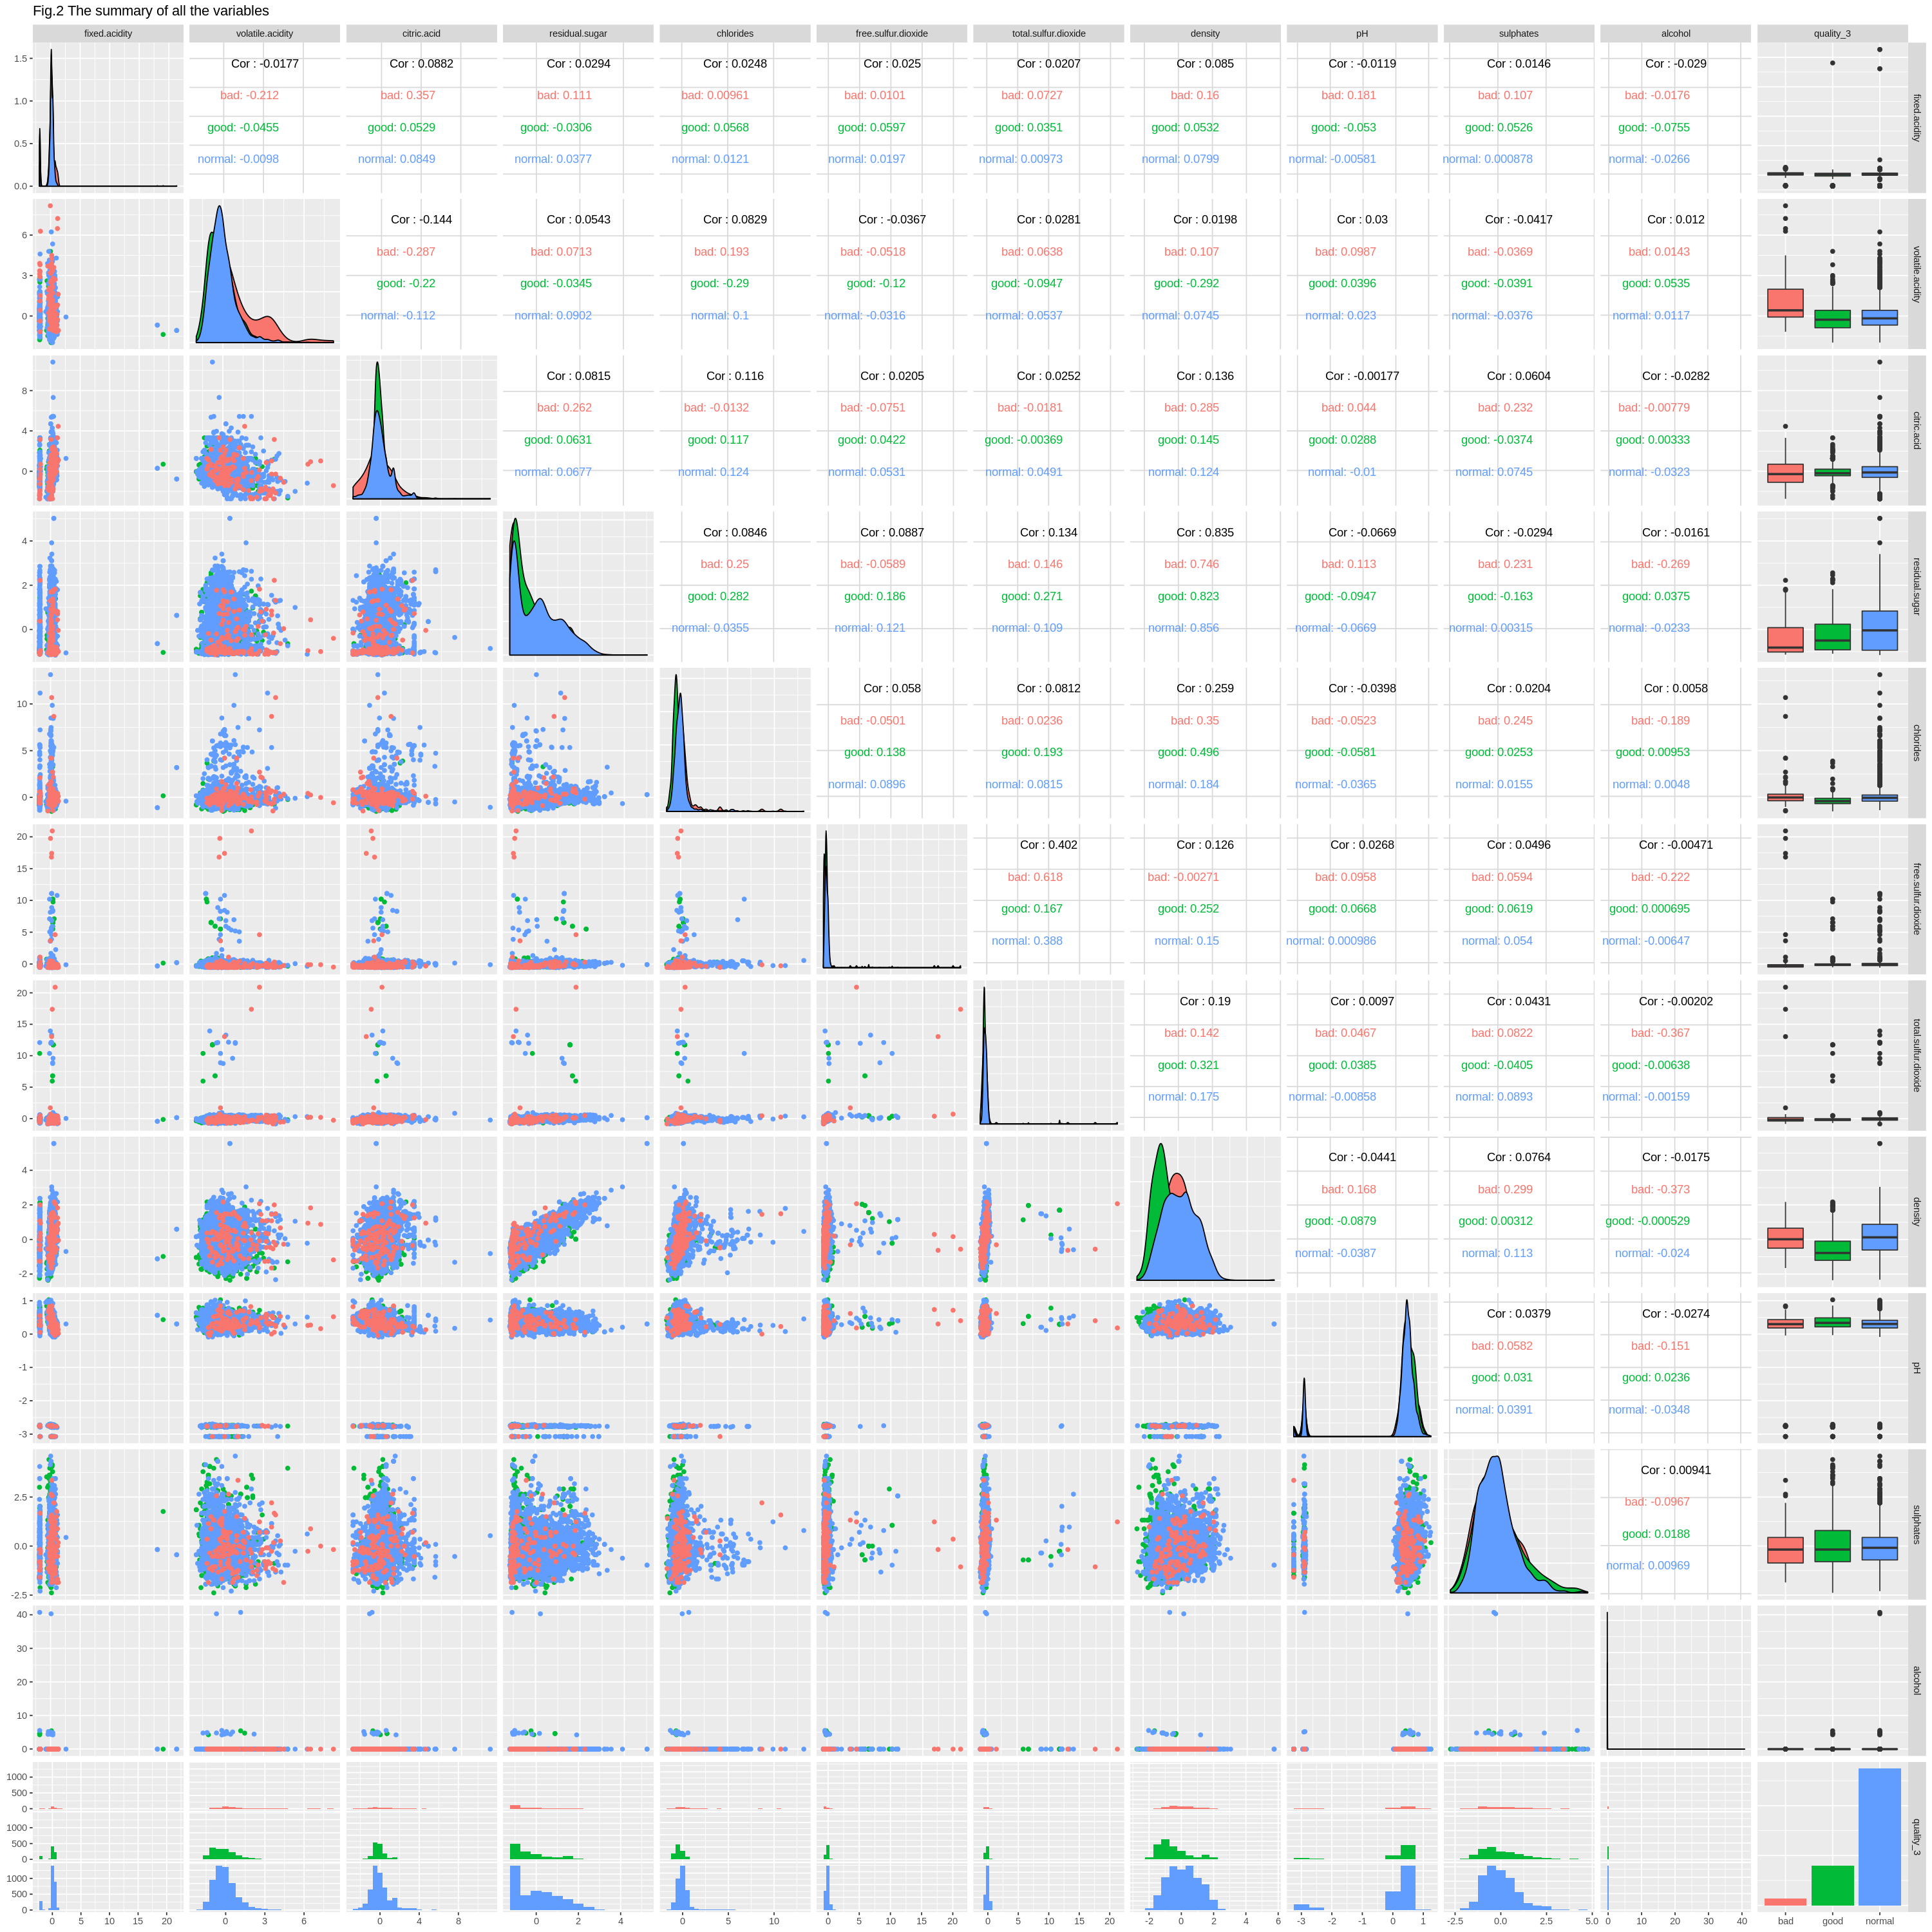

In [ ]:
options(repr.plot.width = 25, repr.plot.height = 25) 
summarize_train<-scaled_training_set%>%
    select(-quality)
summarize_all<-ggpairs(summarize_train,aes(colour=quality_3),
                       lower=list(combo=wrap("facethist", binwidth=0.5)))

summarize_all+
ggtitle("Fig.2 The summary of all the variables")

From Fig.2 above, we can see that not all the variables will be useful for classification. Therefore, we only picked those variables that can distinguish the three quality types; they are: volatile acidity, citric acid, residual sugar, chlorides, density and sulphates.

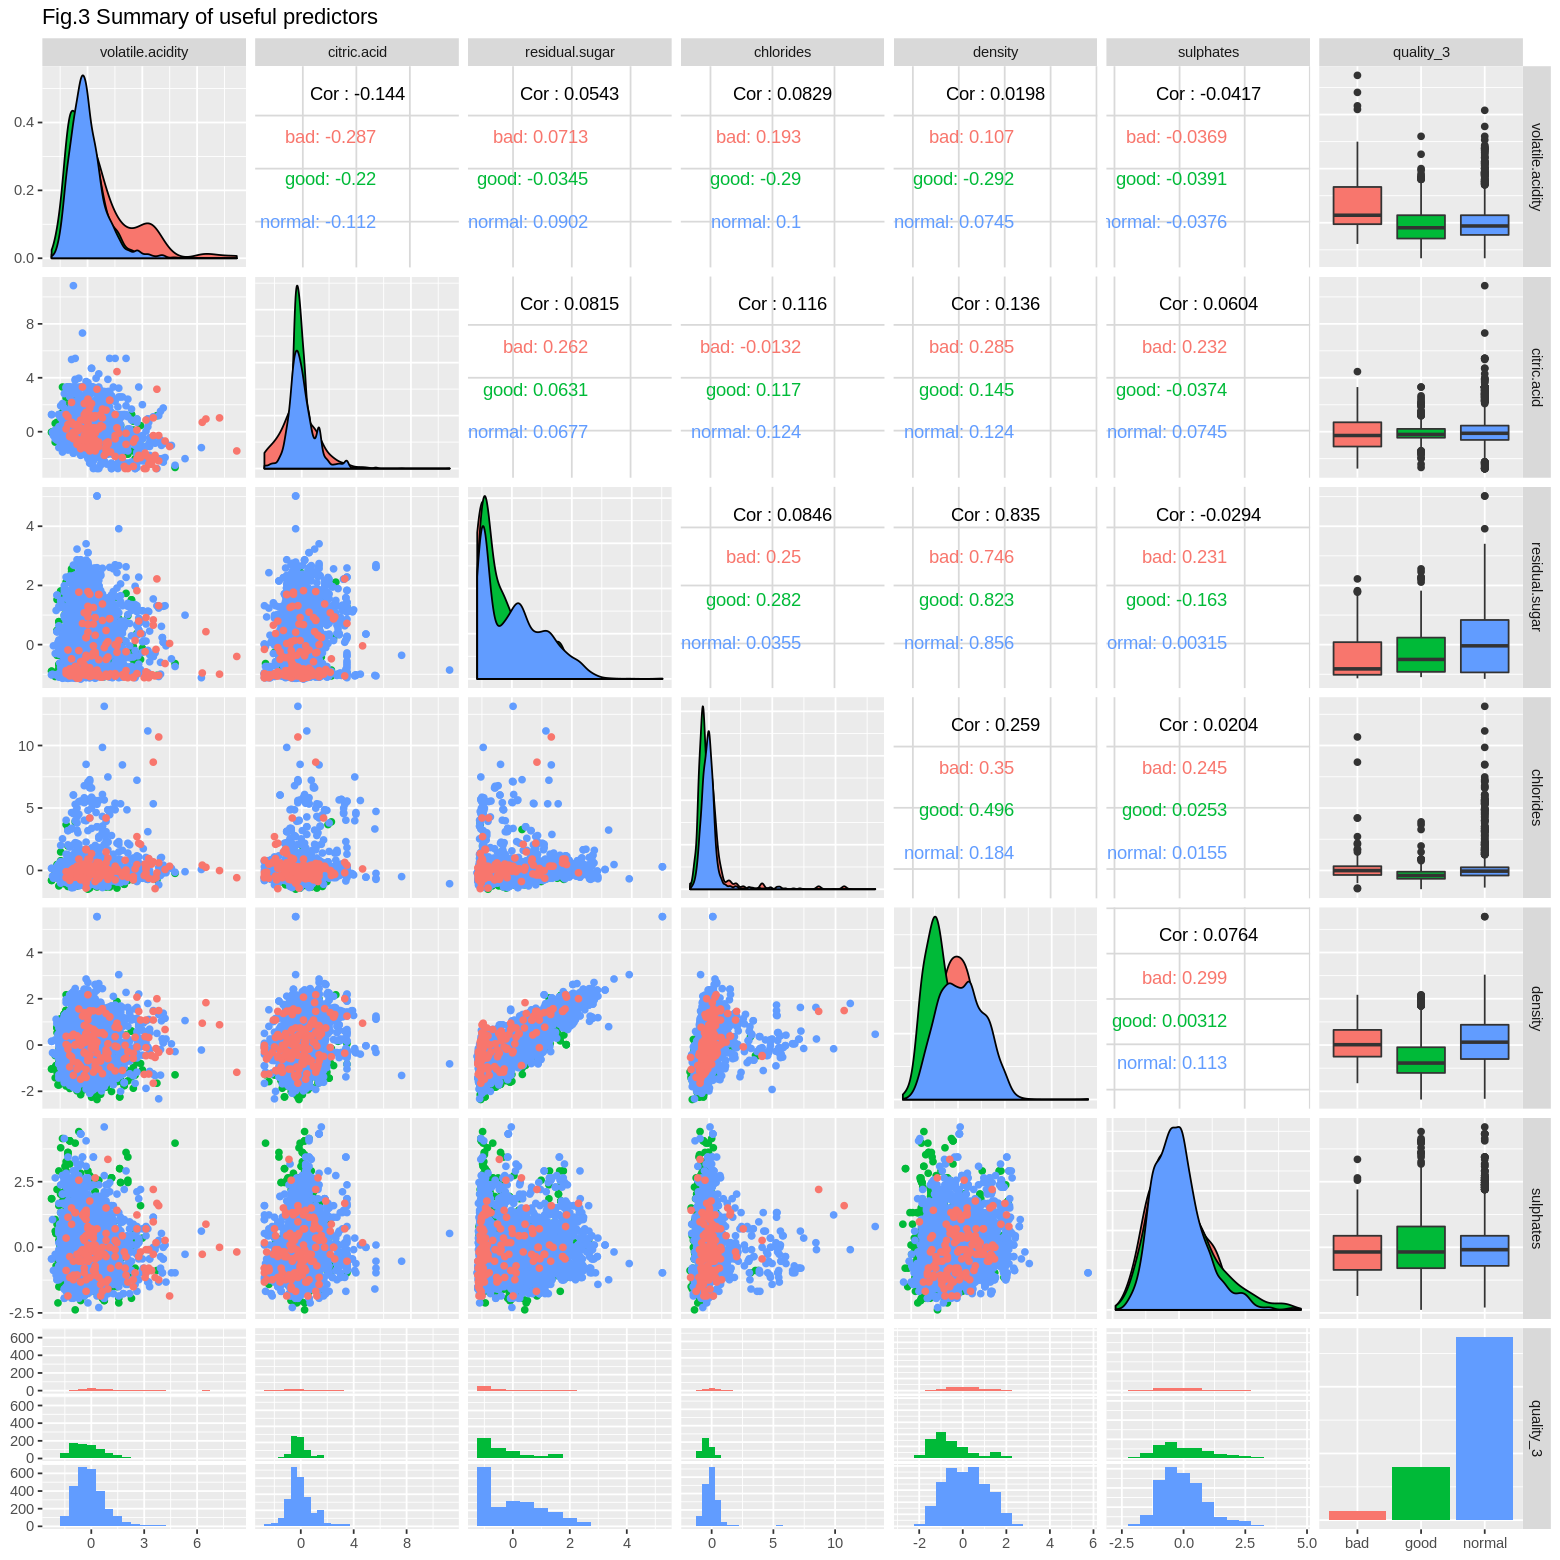

In [ ]:
options(repr.plot.width = 13, repr.plot.height = 13) 
classify_train<-scaled_training_set%>%
    select(volatile.acidity,citric.acid,residual.sugar,chlorides,density,sulphates,quality_3)
summarize_classify<-ggpairs(classify_train,aes(colour=quality_3),
                            lower=list(combo=wrap("facethist", binwidth=0.5)),
                            title="Fig.3 Summary of useful predictors")

summarize_classify

**2.4 Data Classification**

We upsampled the imbalanced training set. Then we tried different k-values, and picked k=1 since it has the highest accuracy in 5-folds cross-validation.

Then we established our classification model and tested it on our testing set; the prediction accuracy is 78%.

In [ ]:
#This is for the upsample
X_pretrain<-classify_train %>% 
  select(-quality_3) %>% 
  data.frame()
Y_pretrain<-classify_train %>% 
  select(quality_3) %>% 
  unlist()

In [ ]:
#Upsample the training set and the result
balanced_training_set <- upSample(x =X_pretrain, y = Y_pretrain)
head(balanced_training_set)
balanced_training_set %>% 
    group_by(Class) %>%
    summarize(n = n())

volatile.acidity,citric.acid,residual.sugar,chlorides,density,sulphates,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.81633153,1.0249018,0.8165996,-0.36066025,0.53398986,-1.6778747,bad
2.05906916,-2.7346653,-0.9770491,0.82267794,-0.01206807,-0.7955788,bad
3.15267828,-1.5904492,-0.2396602,0.51588655,0.36334676,-1.1484972,bad
0.41865548,1.1066315,-0.2595896,-0.09769621,-1.03592668,-0.7073492,bad
3.89832086,-2.1625573,-1.0368374,0.60354123,-0.31922565,-1.2367268,bad
0.02097944,-0.4462331,0.4180110,0.03378581,0.73876158,0.4396354,bad


Class,n
<fct>,<int>
bad,2742
good,2742
normal,2742


In [ ]:
#Classification preparation
X_train<-balanced_training_set %>% 
  select(-Class) %>% 
  data.frame()
Y_train<-balanced_training_set%>% 
  select(Class) %>% 
  unlist()
X_test<-scaled_testing_set %>% 
  select(-quality,-quality_3) %>% 
  data.frame()
Y_test<-scaled_testing_set%>% 
  select(quality_3) %>% 
  unlist()

In [ ]:
#Choosing the best K
ks = data.frame(k = c(1,2,3,4,5))
train_control <- trainControl(method = "cv", number = 5)
choose_k<- train(x=X_train,y=Y_train,method = "knn", tuneGrid = ks, trControl = train_control)
k_accuracies <- choose_k$results %>%
                    select(k, Accuracy)
k_accuracies

k,Accuracy
<dbl>,<dbl>
1,0.9369083
2,0.8825673
3,0.8479222
4,0.8251885
5,0.8078047


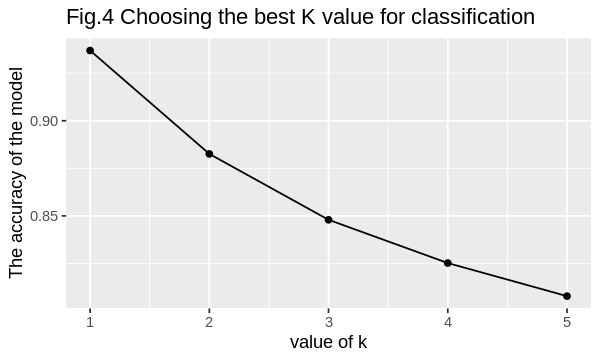

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 3) 
choose_k_plot<- ggplot(k_accuracies,aes(x=k,y=Accuracy))+
    geom_line()+ geom_point()+
    labs(x="value of k",y="The accuracy of the model")+
    ggtitle("Fig.4 Choosing the best K value for classification")
choose_k_plot

From Fig.4, we can see that k=1 is the optimal choice. 

In [ ]:
k = data.frame(k = 1)
classify<-train(x=X_train,y=Y_train,method = "knn", tuneGrid = k)


**2.5 Test Result**

In [ ]:
test_pred <- predict(classify, X_test)
test_results <- confusionMatrix(test_pred, Y_test)
test_results

Confusion Matrix and Statistics

          Reference
Prediction bad good normal
    bad     11    4     19
    good     6  170    118
    normal  28   91    776

Overall Statistics
                                          
               Accuracy : 0.7825          
                 95% CI : (0.7583, 0.8053)
    No Information Rate : 0.7465          
    P-Value [Acc > NIR] : 0.001857        
                                          
                  Kappa : 0.457           
                                          
 Mcnemar's Test P-Value : 0.132123        

Statistics by Class:

                     Class: bad Class: good Class: normal
Sensitivity            0.244444      0.6415        0.8499
Specificity            0.980475      0.8706        0.6161
Pos Pred Value         0.323529      0.5782        0.8670
Neg Pred Value         0.971405      0.8977        0.5823
Prevalence             0.036795      0.2167        0.7465
Detection Rate         0.008994      0.1390        0.6345
Det

In [ ]:
test_results$overall[1]

Accuracy 
0.782502

From the test result, we can see that the accuracy is 78.25%. We think the classification model is quite good.

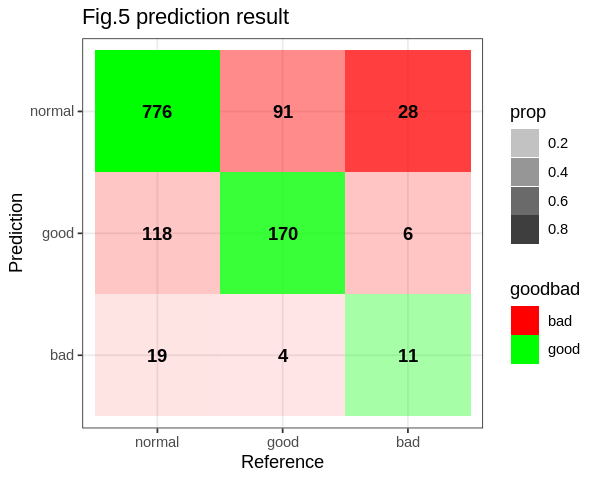

In [ ]:
table <- data.frame(confusionMatrix(test_pred, Y_test)$table)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))
classify_result<-ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1) +
  scale_fill_manual(values = c(good = "green", bad = "red")) +
  theme_bw() +
  xlim(rev(levels(table$Reference)))+
  ggtitle("Fig.5 prediction result")
options(repr.plot.width = 5, repr.plot.height = 4) 
classify_result

From Fig.5, we can see that the classification model predicted most accurately "normal" type quality scores, and least accurately "bad" type quality scores. This might be due to the imbalanced testing set.

## 3. Discussion

**3.1 Summary**

After splitting the dataset into training and testing sets, we performed 5 fold cross-validation on the training set. After testing, we found that the model predicted “normal” wine the best. Since the testing set had a fewer number of observations that were “bad”, the accuracy of our model was lower for that class. Out of 45 “bad” wines, our model predicted 28 of them to be “normal”. Therefore, the sensitivity is lowest for “bad” wine (0.244) and highest for “normal” wine (0.849). Overall, the accuracy of our classification model is 78.25%.


**3.3 Impacts of the findings**

The results of this model would be valuable to wine producers, certification entities, and retailers. The impact of our findings has the potential to add an objective analytical element to an otherwise subjective practice. This would greatly aid in defining the complex relationship between physicochemical properties and sensory analysis (Cortez et al., 2009). Using the trends and patterns found in the data, the production and classification of wine can be optimized for the highest chance of success. 

Quality assessment is a key factor in the production process of wine. By identifying the most influential factors that affect wine quality, producers can filter and choose raw ingredients with prior laboratory tests to check for physicochemical properties needed for a certain quality of wine. For example, alcohol concentration can be adjusted by monitoring the grape sugar concentration prior to harvest (Cortez et al., 2009). 

Furthermore, the model can be used to support wine expert evaluations by improving the speed and quality of decision making (Cortez et al., 2009). The wine certification process relies mainly on human experts; however, research has shown that taste is the least understood of the human senses (Smith, 2006), which makes wine classification a difficult task. It is hard to guarantee the experience and knowledge of experts will be consistent and equal; therefore, the certification process can be prone to subjective factors that are hard to control. A data-driven approach using objective testing can be integrated as an aid to the decision-making system, as well as a tool to improve the training of future oenology students. 

For retailers, the model can offer insight to the target marketing of different wine brands and how the premium certification of a wine influences consumer buying behaviours. This may also help manufacturers identify distinct features demonstrating higher demand in the market and set prices appropriately. 

**3.4 Further Analysis**

The ability to use objective measures and analytical testing to aid in subjective evaluation raises many questions about what other ways classification models can be used in sensory analysis. 

Much of the decisions we make everyday are influenced by expert ratings and fellow consumer reviews. We can ask questions about whether objective analysis can be applied to other aspects of sensory analysis besides taste. While food critic ratings can be analyzed using quantitative data derived from the chemical properties of food, it would be interesting to think of whether similar methods can be applied to the other four senses – sight, touch, hear, and smell. 

For instance, whether movie critic ratings can be predicted based on quantitative data such as the script’s word count, the accolades of the director or actors, and ticket sales. Another example could be whether we can predict the ranking of a song on music charts based on the number of major or minor chords used, the frequency of certain words in the lyrics, or the duration of the song. Would the model be able to derive results of the same level of accuracy and applicability as our wine quality assessment? Is the method limited to certain types of sensory and subjective ranking procedures, and what would we define these limitations by? Many questions would have to be answered before we can employ similar models. This offers room for further analysis as to how we can employ different classification tools to build more sophisticated models that would cover a wider range of functions. 



## 4. References
Comissão de Viticultura da Região dos Vinhos Verdes (CVRVV). (2008, July). *Portuguese Wine — Vinho Verde.* Retrieved from http://www.vinhoverde.pt 

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. *Decision Support Systems*, 47(4), 547–553. doi: 10.1016/j.dss.2009.05.016 

Food and Agriculture Organization of the United Nations (FAOSTAT). (2019, October 9). *Food and Agriculture Organization Agriculture Trade Domain Statistics.* Retrieved from http://faostat.fao.org/site/535/DesktopDefault.aspx?PageID=535 

Smith, D. V., & Margolskee, R. F. (2001). Making sense of taste. *Scientific American*, 284(3), 32-39. Retrieved from www.jstor.org/stable/26059127 

Wines of Portugal. (n.d.). *A World of Difference: Vinho Verde*. Retrieved from http://www.winesofportugal.info/pagina.php?codNode=3889 